In [ ]:
# APRENDISAJE SUPERVISADO
# SE APLICARA EL ALGORITMO PARA PROBLEMAS DE CLASIFICACION: SUPPORT VECTOR MACHINES

In [3]:
#Cargamos las librerias que vamos a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import ast


In [4]:
# Ingestamos el dataset

d = pd.read_csv('movies_dataset.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_22140\125563529.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv('movies_dataset.csv')


In [5]:
# 1. Algunos campos estan anidados deberan ser desanidados para unirlos al dataset
# Para las listas

def fetch_name(obj):
    if isinstance(obj,str) and '{' in obj:
        s = [] 
        for i in ast.literal_eval(obj):
            s.append(i['name']);
        return s

In [6]:
# Para los diccionarios

def fetch_name1(obj):
    if isinstance(obj,str) and '{' in obj:
        dic = ast.literal_eval(obj)
        return dic['name']

In [7]:
d['genres'] = d['genres'].apply(fetch_name)
d['belongs_to_collection'] = d['belongs_to_collection'].apply(fetch_name1)
d['production_companies'] = d['production_companies'].apply(fetch_name)
d['production_countries'] = d['production_countries'].apply(fetch_name)
d['spoken_languages'] = d['spoken_languages'].apply(fetch_name)

In [8]:
# 2. Borrar un conjunto de columnas que no voy a utilizar

columnas_descartables = ['video','imdb_id','adult','original_title','vote_count','poster_path','homepage']
d = d.drop(columns=columnas_descartables)

In [9]:
# 3. Los valores nulos del campo revenue y budget se rellena con ceros
# Para el campo revenue

d['revenue'] = d['revenue'].fillna(0)

In [10]:
# Para el campo budget 

d['budget'] = d['budget'].fillna(0)

In [11]:
# 4. Las fechas deberan tener el formato AAA-mm-dd, ademas se crea la columna release_year

# Borrar los valores nulos del campo release_date

d = d.dropna(subset=['release_date'])

In [12]:
# Transformando a datatime

d['release_date'] = pd.to_datetime(d['release_date'],format='%Y-%m-%d',errors='coerce')

In [13]:
# Comprobando si tiene valores nulos

d['release_date'].isna().sum()

3

In [14]:
# Borrando los valores nulos

d = d.dropna(subset=['release_date'])

In [15]:
# Comprobando si hay valores nulo

d['release_date'].isna().sum()

0

In [16]:
# Se crea la columna release_year

d['release_year'] = d['release_date'].dt.year

In [17]:
# 5. Crear la columna return(retorno de inversion) dividiendo revenue/budget, cuando no hay datos disponibles 
# para calcularlos, debera tomar el valor 0

# El campo budget pasar de datos type object a float

d['budget'] = pd.to_numeric(d['budget'], downcast='float', errors='coerce')

In [18]:
# Dividiendo los campos revenue/budget

d['return'] = d['revenue'].divide(d['budget']).fillna(0)

In [19]:
# Cambiar los valores inf por NAN

d['return'].replace([np.inf,-np.inf], np.nan, inplace=True)

In [20]:
# Cambiando los NAN por cero

d['return'].fillna(0, inplace = True)

In [21]:
# Ingestamos el| dataset final

d.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
0,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,7.7,1995,12.451801
1,None,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.043035
2,Grumpy Old Men Collection,0.0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,0.000000


In [ ]:
# APLICACION DEL ALGORITMO SUPPORT VECTOR MACHINES

<AxesSubplot: xlabel='release_year', ylabel='budget'>

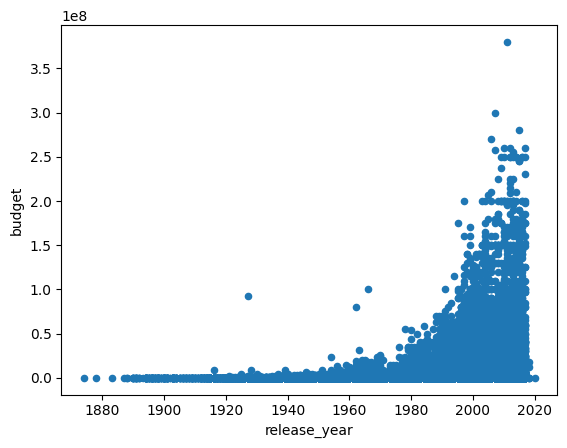

In [23]:
# Se muestra la relacion entre los campos budget y release_year

d.plot.scatter(y = 'budget', x = 'release_year')

In [31]:
# Nos quedamos con las columnas budget y release_year y como target la columna runtime

x = d.iloc[:,[1,17]].values
y = d.iloc[:,11].values

In [32]:
# Separamos los datos de entrenamiento de los datos de prueba

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.25, random_state=0)

In [33]:
# Estandarizamos

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


In [34]:
# Entrenamos, para ello, utilizamos la clase SVC de la libreria Scikit-learn

from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [35]:
# Predecimos

Y_Pred = classifier.predict(X_Test)

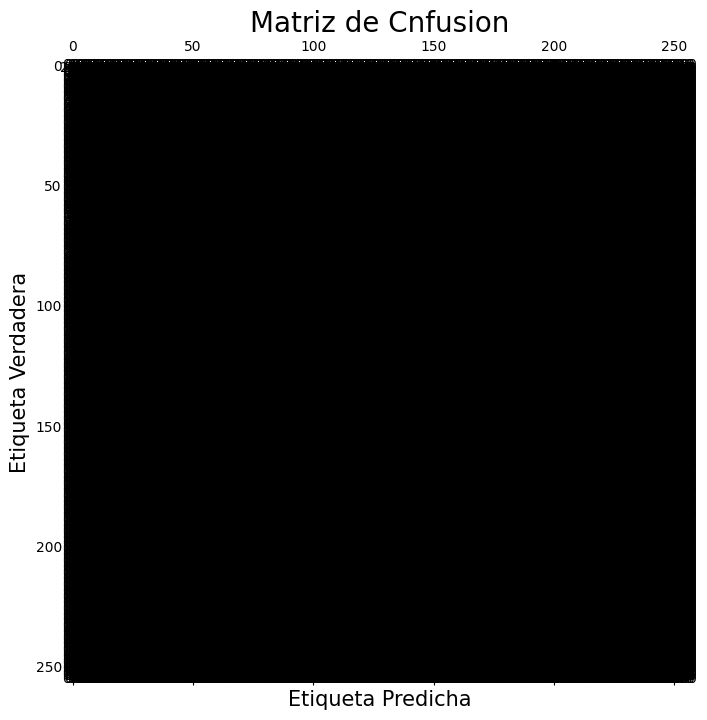

In [36]:
# Evaluamos
# Matriz de confucion

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Cnfusion', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [ ]:
# Las etiquetas que corresponden a las categorias que hay el modelo no las predijo, debido a la configuracion 
# de la matriz o a los datos de las columnas que no guardan relacion

In [37]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       373
         1.0       0.38      0.93      0.54        27
         2.0       0.00      0.00      0.00        13
         3.0       0.00      0.00      0.00         9
         4.0       0.00      0.00      0.00        10
         5.0       0.00      0.00      0.00        18
         6.0       0.00      0.00      0.00        17
         7.0       0.00      0.00      0.00        32
         8.0       0.00      0.00      0.00        14
         9.0       0.00      0.00      0.00         9
        10.0       0.00      0.00      0.00        16
        11.0       0.00      0.00      0.00        11
        12.0       0.00      0.00      0.00        12
        13.0       0.00      0.00      0.00         9
        14.0       0.00      0.00      0.00         9
        15.0       0.00      0.00      0.00        12
        16.0       0.00      0.00      0.00        11
        17.0       0.00    

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [ ]:
# En calculo de la presicion no se encontro una linea que los pudiera representar
# por eso grafico de set de entrenamiento no se realizo

In [41]:
# Set de entrenamiento
from matplotlib.colors import ListedColormap

X_set, Y_set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1, step=0.01),
np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1, step=0.01))
plt.figure(figsize=(14,8))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,
             cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0], X_set[Y_set==j,1], C=[ListedColormap(('red','green'))(i)],label=j)
plt.title('Support vector machine(Set de entrenamiento)', fontsize=20)
plt.xlabel('Año de lanzamiento', fontsize=20)
plt.ylabel('Presupuesto', fontsize=20)
plt.legend()
plt.show()
                     